# Install and import libraries

In [1]:
!pip install whit-phys-util

     |████████████████████████████████| 10.1MB 481kB/s 


In [7]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc

In [3]:
repo = buc.local_repository("https://github.com/WhitworthPhysics/blackbody-radiation-wiens-law-and-inverse-square-law-maloch18.git")

Cloning repository from GitHub.


# Temperature dependence of the blackbody spectrum

## Equipment and materials
| Description | Manufacturer | Model | ID or SN |
| ----------- | ------------ | ----- | -------- |
| radiation sensor | PASCO | TD-8553 | 001369 |
| Stefan-Boltzmann lamp | PASCO | TD-8555 | NAS 1464-062-06 |
| Digital multimeters (2) | Fluke | 117 | 49640101SV, 49640102SV |
| power supply (max. 13 V DC, min. 2 A) | Cenco | 79550 | P-176 |
| spectrometer | Ocean Optics | USB4000 | USB4F07107 |

In [4]:
R_room = 2.5 # ohms
T_room = 273.15 + 22.0 # K
a = 4.5e-3
R_ref = R_room + a*R_room*(300-T_room)

In [8]:
df_lamp_calib = pd.read_csv('lamp_calibration.csv')
convert_Rratio_to_T = interp1d(df_lamp_calib['R Ratio'], df_lamp_calib['Temperature (K)'], kind='cubic')

In [16]:
df_wien = pd.read_table('Wiens_law_data.tsv')
df_wien['R (ohms)'] = df_wien['Voltage (V)']/df_wien['Current (A)']
df_wien['R ratio'] = df_wien['R (ohms)']/R_ref
df_wien['Temperature (K)'] = convert_Rratio_to_T(df_wien['R ratio'])
df_wien['1/T (K^-1)'] = 1/df_wien['Temperature (K)']
df_wien['Peak wavelength (m)'] = df_wien['Peak wavelength (nm)'] * 10**(-9)
df_wien

,Voltage (V),Current (A),Peak wavelength (nm),R (ohms),R ratio,Temperature (K),1/T (K^-1),Peak wavelength (m)
0,5.764,2.093,680,2.753942,1.078048,318.146740,0.003143,6.800000e-07
1,7.810,2.456,645,3.179967,1.244819,356.987363,0.002801,6.450000e-07
2,9.660,2.757,630,3.503808,1.371588,386.462800,0.002588,6.300000e-07
3,11.380,3.016,615,3.773210,1.477047,410.874159,0.002434,6.150000e-07


In [17]:
fitTable_wien, fitFunc_wien = buc.prettyPolyFit(df_wien['1/T (K^-1)'], df_wien['Peak wavelength (m)'])
fitTable_wien

,slope,intercept
value,0.000090,3.947767e-07
uncertainty,0.000009,2.525560e-08


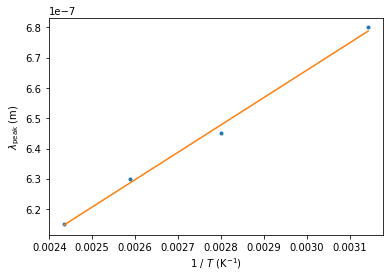

In [18]:
fig_wien, ax_wien = plt.subplots()
ax_wien.plot(df_wien['1/T (K^-1)'], df_wien['Peak wavelength (m)'], '.')
ax_wien.plot(df_wien['1/T (K^-1)'], fitFunc_wien(df_wien['1/T (K^-1)']))
ax_wien.set_xlabel('$1 \ / \ T \ (\mathrm{K}^{-1})$')
ax_wien.set_ylabel('$\lambda_{\mathrm{peak}}$ (m)');

In [21]:
b = 2.898e-3
slope_wien = fitTable_wien.iat[0, 0]
slope_unc_wien = fitTable_wien.iat[1, 0]
error_wien = 100 * abs((slope_wien - b) / b)
print("The slope of the wavelength at the emission peak vs. the inverse of the temperature\nwas determined to be ({:.6f} +/- {:.6f}) m*K with an error of {:.1f}% from the reference value." .format(slope_wien, slope_unc_wien, error_wien))

The slope of the wavelength at the emission peak vs. the inverse of the temperature
was determined to be (0.000090 +/- 0.000009) m*K with an error of 96.9% from the reference value.


Although my data verified the linear relationship of $\lambda_{\mathrm{peak}}$ vs. $\frac{1}{T}$, the slope did not agree with the accepted value.

# Distance dependence of intensity

## Equipment and materials
| Description | Manufacturer | Model | ID or SN |
| ----------- | ------------ | ----- | -------- |
| radiation sensor | PASCO | TD-8553 | 001369 |
| Stefan-Boltzmann lamp | PASCO | TD-8555 | NAS 1464-062-06 |
| Digital multimeters (2) | Fluke | 117 | 49640101SV, 49640102SV |
| power supply (max. 13 V DC, min. 2 A) | Cenco | 79550 | P-176 |
| photodiode detector | Thorlabs | PDA36A | N/A |
| long-pass filter | Thorlabs | FGL610 | N/A |
| meter stick | N/A | N/A | N/A |

In [ ]:
df_dist = pd.read_table('inverse_square_data.tsv')

In [ ]:
def I(x, x0, n, a):
  return a / (x - x0)**n

In [ ]:
df_dist = pd.read_table('inverse_square_data.tsv')
[param, cov] = curve_fit(I, df_dist['x (m)'], df_dist['I (W/m^2)'])
x0 = param[0]
n = param[1]
a = param[2]
print("The values of n and x0 were determined to be {:.1f} and {:.2e} m, respectively." . format(n, x0))

In [ ]:
fig_dist, ax_dist = plt.subplots()
ax_dist.plot(df_dist['x (m)'], df_dist['I (W/m^2)'], '.')
ax_dist.plot(df_dist['x (m)'], I(df_dist['x (m)'], x0, n, a))
ax_dist.set_xlabel('$x$ (m)')
ax_dist.set_ylabel('$I (\mathrm{W} / \ / \mathrm{m}^2$');